# CMPT 732 - Fall 2022
# PyTorch tutorial - Part II

__content creator:__ Aryan Mikaeili

# Setting up Colab

1. Opening the notebook
2. Changing runtime type to GPU


# Installing PyTorch

Go to https://pytorch.org/. There you can find instructions on how to install PyTorch based on your machine. If using Lab machines, no need to install PyTorch.

# Tensors

Four important attributes:
1. Data
2. Type
3. Device
4. Requires Grad

In [2]:
import torch
import numpy as np

In [ ]:
#defining an empty tensor and observing the default attributes
t = torch.tensor([1, 2, 3])

print('type:', type(t))
print('dtype:', t.dtype)
print('device:', t.device)
print('requires grad:', t.requires_grad)


In [ ]:
#defining an arbitrary tensor

t = torch.tensor(np.array([1, 2, 3]), dtype=torch.float64, device='cuda:0',requires_grad=True)

print('type:', type(t))
print('dtype:', t.dtype)
print('device:', t.device)
print('requires grad:', t.requires_grad)

#Controlling devices in PyTorch


In [ ]:
t1 = torch.tensor([], device = torch.device('cpu'))

print('t1 device:', t1.device)

t2 = t1.cuda()
print('t2 device:', t2.device)

t3 = t1.cpu()
print('t3 device:', t1.device)





In [ ]:
device = torch.device('cuda:0')

t = torch.tensor([])

t1 = t.to(device)

print('t1 device:', t1.device)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(torch.cuda.is_available())
print('device:', device)


#Accessing an item in PyTorch

In [ ]:
import numpy as np

t = torch.tensor([1, 2, 3])
print(t[1])

n = np.array([1, 2, 3])
print(n[1])


In [ ]:
print(t[1].item())

#Converting tensors to and from numpy arrays

In [ ]:
t = torch.tensor([1, 2, 3])
n = t.numpy()

print('n:',n)
tn = torch.from_numpy(n)
print('tn:',tn)



# Important operations on tensors

In [ ]:
#unsqueeze
t = torch.tensor([1, 2, 3])

t_u = torch.unsqueeze(t, 0)
print('t shape:', t.shape)
print('t_u shape:', t_u.shape)

In [ ]:
#cat
a = torch.randn((8, 3))
b = torch.randn((4, 3))

c = torch.cat([a, b], dim = 0)

print(c.shape)

In [ ]:
#permute
a = torch.randn((4, 100, 200, 3))

a_perm = a.permute((0, 3, 1, 2))

print(a_perm.shape)


In [ ]:
#matrix multiplication

a = torch.randn(4, 3)
b = torch.randn(3, 5)

ab_mult = a @ b
print(ab_mult.shape)

In [ ]:
#batch matrix multiplication

a = torch.randn(100, 4, 3)
b = torch.randn(100, 3, 5)

ab_mult = torch.bmm(a, b)
print(ab_mult.shape)

In [ ]:
#inplace operations


# Autograd Package

In [ ]:
N, D = 3, 4

x = torch.randn(N, D, requires_grad=True)
y = torch.randn(N, D)
z = torch.randn(N, D)

a = x * y
b = a + z
c = b.sum()



In [ ]:
#backward

In [ ]:
#computation graph and the backward method

In [ ]:
#accumulation of gradients in the backward method

# the NN module

In [ ]:
import torch.nn as nn

l = nn.Linear(in_features = 1000, out_features = 100, bias = True)

x = torch.randn(64, 1000)

output = l(x)

print('shape of output:', output.shape)


In [ ]:
print('weight shape:',l.weight.shape)
print('bias shape:',l.bias.shape)
print('type of weight', type(l.weight))

In [ ]:
conv2d = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5)
image = torch.randn(100, 100, 3)

image = torch.unsqueeze(image, 0)
print('image shape 1:', image.shape)

image = image.permute(0, 3, 1, 2)
print('image shape 2:',image.shape)

output = conv2d(image)

print('output shape:',output.shape)

print('weights shape:', conv2d.weight.shape)



In [ ]:
conv2d = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5)
image = torch.randn(100, 100, 3)


image = torch.unsqueeze(image, 0)
print('image shape 1:', image.shape)


image = image.permute(0, 3, 1, 2)
print('image shape 2:',image.shape)

output = conv2d(image)

print('output shape:',output.shape)

In [ ]:
print(conv2d.weight.shape)

# Datasets, Dataloaders and Torchvision transforms

In [8]:
#Available datasets
import torchvision.transforms as transforms
from torchvision import datasets

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

b_size = 4

trainset = datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=b_size,
                                           shuffle=True, num_workers=0)




  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


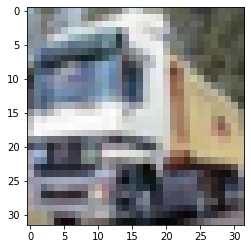

In [9]:
import matplotlib.pyplot as plt

image, label = trainset.__getitem__(1)
image = image.permute(1, 2, 0).numpy()

image = ((image + 1) * 127.5).astype('uint8')
plt.imshow(image)
plt.show()




In [10]:
for i, data in enumerate(trainloader):
  images, labels = data
  print(i, images.shape, labels.shape)

0 torch.Size([4, 3, 32, 32]) torch.Size([4])
1 torch.Size([4, 3, 32, 32]) torch.Size([4])
2 torch.Size([4, 3, 32, 32]) torch.Size([4])
3 torch.Size([4, 3, 32, 32]) torch.Size([4])
4 torch.Size([4, 3, 32, 32]) torch.Size([4])
5 torch.Size([4, 3, 32, 32]) torch.Size([4])
6 torch.Size([4, 3, 32, 32]) torch.Size([4])
7 torch.Size([4, 3, 32, 32]) torch.Size([4])
8 torch.Size([4, 3, 32, 32]) torch.Size([4])
9 torch.Size([4, 3, 32, 32]) torch.Size([4])
10 torch.Size([4, 3, 32, 32]) torch.Size([4])
11 torch.Size([4, 3, 32, 32]) torch.Size([4])
12 torch.Size([4, 3, 32, 32]) torch.Size([4])
13 torch.Size([4, 3, 32, 32]) torch.Size([4])
14 torch.Size([4, 3, 32, 32]) torch.Size([4])
15 torch.Size([4, 3, 32, 32]) torch.Size([4])
16 torch.Size([4, 3, 32, 32]) torch.Size([4])
17 torch.Size([4, 3, 32, 32]) torch.Size([4])
18 torch.Size([4, 3, 32, 32]) torch.Size([4])
19 torch.Size([4, 3, 32, 32]) torch.Size([4])
20 torch.Size([4, 3, 32, 32]) torch.Size([4])
21 torch.Size([4, 3, 32, 32]) torch.Size([4]

KeyboardInterrupt: ignored

In [ ]:
#arbitrary dataset
import torch
images = torch.randn(100, 3, 32, 32)
labels = torch.randint(10, (100,))



from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

class my_data(Dataset):
  def __init__(self, images, labels):
    super().__init__()
    self.images = images
    self.labels = labels

  def __getitem__(self, idx):

    return self.images[idx], self.labels[idx]

  def __len__(self):
    return self.images.shape[0]


dataset = my_data(images, labels)
dataloader = DataLoader(dataset, batch_size = 8, shuffle=True, drop_last=True)


for i, data in enumerate(dataloader):
  images, labels = data
  print(i, images.shape, labels.shape)

# Exercise

Cifar10 classifier with the following structure (see the attached framework):

__two Convolutional blocks__
1. 2D convolution layer: 3 channels (first block) 16 channels (second block) to 16 channels with kernel size 5
2. ReLU activation
3. 2D max pooling layer

__Flatten__

1. Linear layer with appropriate number of input nodes and 128 output nodes + ReLU
2. Linear layer with 128 input nodes and 64 output nodes + ReLU
3. Linear Layer with 64 input nodes and 10 output nodes
